In [40]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.models import GoogLeNet_Weights
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [41]:
img = Image.open("versicolor.jpeg").convert("RGB")

In [42]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [43]:
img_tensor = transform(img).unsqueeze(0)

In [44]:
weights = GoogLeNet_Weights.DEFAULT
model_pre = models.googlenet(weights=weights)
model_pre.eval()

with torch.no_grad():
    output = model_pre(img_tensor)
    pred = output.argmax(1).item()

labels = weights.meta["categories"]
label = labels[pred]

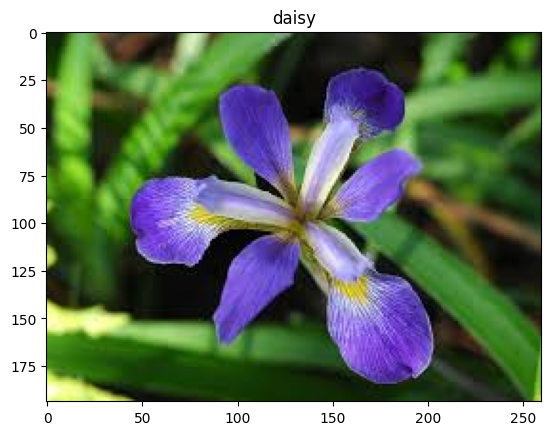

In [45]:
plt.imshow(img)
plt.title(label)
plt.show()

In [46]:
iris = load_iris()
X = iris.data
y = iris.target

X_img = np.array([np.pad(x,(0,224*224 - 4),'constant').reshape(1,224,224).repeat(3,axis=0) for x in X])
X_img = X_img.astype(np.float32)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_img, y, test_size=0.2, random_state=42)

In [48]:
class IrishDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X)
        self.y = torch.tensor(y).long()

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return len(self.y)

In [49]:
train_loder = DataLoader(IrishDataset(X_train, y_train), batch_size=8, shuffle=True)

In [50]:
model = models.googlenet(weights=weights)
model.fc = nn.Linear(model.fc.in_features, 3)

In [51]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [72]:
model.train()
for epoch in range(9):
    for imgs, labels in train_loder:
        preds = model(imgs)
        loss = loss_fn(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch}, Loss: {loss.item()}")

Epoch: 0, Loss: 0.139499232172966
Epoch: 1, Loss: 0.15606433153152466
Epoch: 2, Loss: 0.014409760944545269
Epoch: 3, Loss: 0.015698367729783058
Epoch: 4, Loss: 0.17725560069084167
Epoch: 5, Loss: 0.016337141394615173
Epoch: 6, Loss: 0.03482390567660332
Epoch: 7, Loss: 0.19925929605960846
Epoch: 8, Loss: 0.039028361439704895


In [73]:
model.eval()

with torch.no_grad():
    output = model(img_tensor)
    pred = output.argmax(1).item()

iris_labels = ['setosa','versicolor','virginica']
versicolor = iris_labels[pred]

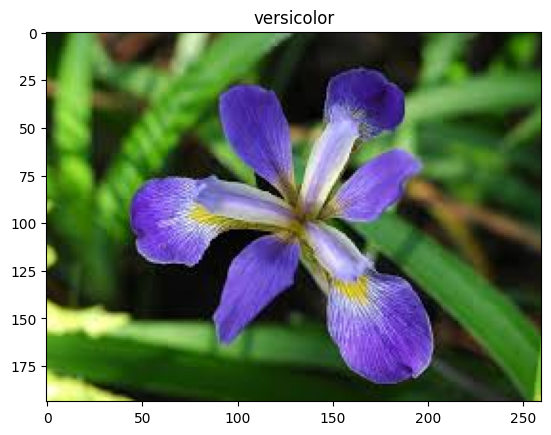

In [74]:
plt.imshow(img)
plt.title(versicolor)
plt.show()